In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [4]:
Nor_path = "./Normal_mixed.csv"
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
                "land", "wrong_fragment", "urgent", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
Nor_df = pd.read_csv(Nor_path, header=None,names= col_names, nrows= 10000)
Nor_df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,OTH,592,0,0,0,0,8,...,50,1.00,0.00,0.29,0.84,0.0,0.00,0.0,0.0,Normal
1,0,tcp,http,OTH,440,0,0,0,0,118,...,39,0.45,0.55,0.00,0.49,0.0,0.00,0.0,0.0,Normal
2,0,tcp,other,OTH,66,0,0,0,0,21,...,76,1.00,0.00,0.14,0.97,0.0,0.00,0.0,0.0,Normal
3,0,tcp,other,OTH,74,0,0,0,0,7,...,3,0.29,0.71,0.00,0.33,0.0,0.00,0.0,0.0,Normal
4,0,icmp,eco_i,SF,60,0,0,0,0,34714,...,52,1.00,0.00,0.98,0.00,0.0,0.00,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,udp,other,SF,5571,1294,0,0,0,1,...,76,1.00,0.00,0.88,0.99,0.0,0.16,0.0,0.0,Normal
9996,0,udp,other,SF,5571,1294,0,0,0,1,...,68,1.00,0.00,0.88,0.99,1.0,0.10,0.0,0.0,Normal
9997,0,tcp,other,OTH,66,0,0,0,0,28,...,51,1.00,0.00,0.42,0.98,0.0,0.00,0.0,0.0,Normal
9998,0,tcp,http,OTH,456,0,0,0,0,336,...,50,0.57,0.43,0.02,0.40,0.0,0.00,0.0,0.0,Normal


In [5]:
Abnor_path = "./Abnormal.csv"
Abnor_df = pd.read_csv(Abnor_path, header=None,names= col_names, nrows= 10000)
Abnor_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,OTH,278,0,0,0,0,25,...,72,1.00,0.00,0.40,0.76,0.0,0.0,0.0,0.0,OaU
1,0,tcp,http,OTH,60,0,0,0,0,25399,...,100,1.00,0.00,0.00,0.52,0.0,0.0,0.0,0.0,DoS
2,0,udp,other,SF,60,0,0,0,0,28065,...,100,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,DoS
3,0,tcp,http,OTH,60,0,0,0,0,56709,...,100,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,DoS
4,0,tcp,http,OTH,210,0,0,0,0,425,...,78,0.79,0.21,0.09,0.37,0.0,0.0,0.0,0.0,DoS_Gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,tcp,http,OTH,283,0,0,0,0,50,...,57,0.68,0.32,0.03,0.40,0.0,0.0,0.0,0.0,FoT
9996,0,tcp,http,OTH,278,0,0,0,0,85,...,92,0.89,0.11,0.43,0.83,0.0,0.0,0.0,0.0,FoT
9997,0,tcp,http,OTH,283,0,0,0,0,201,...,84,0.85,0.15,0.00,0.52,0.0,0.0,0.0,0.0,FoT
9998,0,tcp,http,OTH,54,0,0,0,0,307,...,94,0.92,0.08,0.40,0.87,0.0,0.0,0.0,0.0,DoS_Gas


In [6]:
Train_nor = Nor_df.iloc[:8000]
Train_abnor = Abnor_df.iloc[:8000]
#Test = pd.concat([Nor_df.iloc[-1000:], Abnor_df.iloc[-1000:]],ignore_index=True)
Test_nor = Nor_df.iloc[-1000:]
Test_abnor = Abnor_df.iloc[-1000:]

In [7]:
def nomial(dataset1, dataset2):
    protocol1 = dataset1['protocol_type'].copy()
    protocol2 = dataset2['protocol_type'].copy()
    protocol_type = ["tcp", "udp", "icmp"]
    for i in range(len(protocol_type)):
        protocol1[protocol1 == protocol_type[i]] = i
        protocol2[protocol2 == protocol_type[i]] = i
    dataset1['protocol_type'] = protocol1
    dataset2['protocol_type'] = protocol2

    service1 = dataset1['service'].copy()
    service2 = dataset2['service'].copy()
    service_type = ["other", "private", "ecr_i", "urp_i", "urh_i", "red_i", "eco_i", "tim_i", "oth_i", "domain_u", "tftp_u", "ntp_u", "IRC",
                "X11", "Z39_50", "aol", "auth", "bgp", "courier", "csnet_ns", "ctf", "daytime", "discard", "domain", "echo", "efs", "exec",
                "finger", "ftp", "ftp_data", "gopher", "harvest", "hostnames", "http", "http_2784", "http_443", "http_8001", "icmp", "imap4",
                "iso_tsap", "klogin", "kshell", "ldap", "link", "login", "mtp", "name", "netbios_dgm", "netbios_ns", "netbios_ssn", "netstat",
                "nnsp", "nntp", "pm_dump", "pop_2", "pop_3", "printer", "remote_job", "rje", "shell", "smtp", "sql_net", "ssh", "sunrpc",
                "supdup", "systat", "telnet", "time", "uucp", "uucp_path", "vmnet", "whois"]
    for i in range(len(service_type)):
        service1[service1 == service_type[i]] = i
        service2[service2 == service_type[i]] = i
    dataset1['service'] = service1
    dataset2['service'] = service2

    flag1 = dataset1['flag'].copy()
    flag2 = dataset2['flag'].copy()
    flag_type = ["SF", "S0", "S1", "S2", "S3", "REJ", "RSTOS0", "RSTO", "RSTR", "SH", "RSTRH", "SHR", "OTH"]
    for i in range(len(flag_type)):
        flag1[flag1 == flag_type[i]] = i
        flag2[flag2 == flag_type[i]] = i
    dataset1['flag'] = flag1
    dataset2['flag'] = flag2

def scaler(dataset):
    # num_features = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    #             "land", "wrong_fragment", "urgent", "count", "srv_count", "serror_rate",
    #             "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    #             "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    #             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    #             "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    #             "dst_host_rerror_rate", "dst_host_srv_rerror_rate"
    # ]
    # Duration:
    duration = dataset["duration"].copy()
    dataset["duration"] = duration / 2                              # Max duration in a window frame capture

    # Protocol type:
    protocol_type = dataset["protocol_type"].copy()
    dataset["protocol_type"] = protocol_type / 2                    # 3 protocol types

    # Service
    service = dataset["service"].copy()
    dataset["service"] = service / 71                               # 72 service types

    # Flag
    flag = dataset["flag"].copy()
    dataset["flag"] = flag / 12                                     # 13 flag types

    # Src bytes
    src_bytes = dataset["src_bytes"].copy()
    dataset["src_bytes"] = src_bytes / 65535                        # 2^16 bytes - Max size per TCP packet

    # Dst bytes
    dst_bytes = dataset["dst_bytes"].copy()
    dataset["dst_bytes"] = dst_bytes / 65535                        # 2^16 bytes - Max size per TCP packet

    # Count
    count = dataset["count"].copy()
    dataset["count"] = count / 5000                                 # 2s / minimum time-slot of ACK packets

    # Srv_count
    srv_count = dataset["srv_count"].copy()
    dataset["srv_count"] = srv_count / 5000                         # 2s / minimum time-slot of ACK packets

    # Dst_host_count
    dst_host_count = dataset["dst_host_count"].copy()
    dataset["dst_host_count"] = dst_host_count / 5000               # 2s / minimum time-slot of ACK packets

    # Dst_host_srv_count
    dst_host_srv_count = dataset["dst_host_srv_count"].copy()
    dataset["dst_host_srv_count"] = dst_host_srv_count / 5000       # 2s / minimum time-slot of ACK packets

In [8]:
nomial(Train_nor,Test_nor)
nomial(Train_abnor,Test_abnor)

<ipython-input-7-2aa0009eee62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['protocol_type'] = protocol1
<ipython-input-7-2aa0009eee62>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['protocol_type'] = protocol2
<ipython-input-7-2aa0009eee62>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [9]:
num_features = ["duration", "protocol_type","service", "flag", "src_bytes", "dst_bytes",
                "land", "wrong_fragment", "urgent", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
Train_nor[num_features] = Train_nor[num_features].astype(float)
Test_nor[num_features] = Test_nor[num_features].astype(float)
Test_abnor[num_features] = Test_abnor[num_features].astype(float)
Train_abnor[num_features] = Train_abnor[num_features].astype(float)

<ipython-input-9-f7c6d95ca350>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_nor[num_features] = Train_nor[num_features].astype(float)
<ipython-input-9-f7c6d95ca350>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_nor[num_features] = Test_nor[num_features].astype(float)
<ipython-input-9-f7c6d95ca350>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [10]:
from sklearn.preprocessing import MinMaxScaler

Train_nor[num_features] = MinMaxScaler().fit_transform(Train_nor[num_features].values)
Train_abnor[num_features] = MinMaxScaler().fit_transform(Train_abnor[num_features].values)
Test_nor[num_features] = MinMaxScaler().fit_transform(Test_nor[num_features].values)
Test_abnor[num_features] = MinMaxScaler().fit_transform(Test_abnor[num_features].values)

<ipython-input-10-032381c9d884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_nor[num_features] = MinMaxScaler().fit_transform(Train_nor[num_features].values)
<ipython-input-10-032381c9d884>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_abnor[num_features] = MinMaxScaler().fit_transform(Train_abnor[num_features].values)
<ipython-input-10-032381c9d884>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
scaler(Train)
scaler(Test)

<ipython-input-7-2aa0009eee62>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["duration"] = duration / 2                              # Max duration in a window frame capture
<ipython-input-7-2aa0009eee62>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["protocol_type"] = protocol_type / 2                    # 3 protocol types
<ipython-input-7-2aa0009eee62>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [12]:
Train_nor

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,0.0,0.942857,1.0,0.002518,0.0,0.0,0.0,0.0,0.000087,...,0.50,1.00,0.00,0.292929,0.84,0.0,0.0,0.0,0.0,Normal
1,0.0,0.0,0.942857,1.0,0.001822,0.0,0.0,0.0,0.0,0.001283,...,0.39,0.45,0.55,0.000000,0.49,0.0,0.0,0.0,0.0,Normal
2,0.0,0.0,0.000000,1.0,0.000110,0.0,0.0,0.0,0.0,0.000228,...,0.76,1.00,0.00,0.141414,0.97,0.0,0.0,0.0,0.0,Normal
3,0.0,0.0,0.000000,1.0,0.000147,0.0,0.0,0.0,0.0,0.000076,...,0.03,0.29,0.71,0.000000,0.33,0.0,0.0,0.0,0.0,Normal
4,0.0,1.0,0.171429,0.0,0.000082,0.0,0.0,0.0,0.0,0.377552,...,0.52,1.00,0.00,0.989899,0.00,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.000000,1.0,0.000110,0.0,0.0,0.0,0.0,0.000011,...,0.21,0.00,0.00,0.000000,1.00,0.0,0.0,0.0,0.0,Normal
7996,0.0,0.0,0.000000,1.0,0.000110,0.0,0.0,0.0,0.0,0.001740,...,0.84,0.86,0.14,0.000000,0.42,0.0,0.0,0.0,0.0,Normal
7997,0.0,0.0,0.942857,1.0,0.001680,0.0,0.0,0.0,0.0,0.005134,...,0.85,0.88,0.12,0.000000,0.40,0.0,0.0,0.0,0.0,Normal
7998,0.0,1.0,0.171429,0.0,0.000082,0.0,0.0,0.0,0.0,0.655403,...,0.50,1.00,0.00,0.989899,0.00,0.0,0.0,0.0,0.0,Normal


In [14]:
Label_nor_train = Train_nor['label'].map(lambda x: 'Abnormal' if x != 'Normal' else x)
Label_abnor_train = Train_abnor['label'].map(lambda x: 'Abnormal' if x != 'Normal' else x)
Label_nor_test = Test_nor['label']
Label_abnor_test = Test_abnor['label'].map(lambda x: 'Abnormal' if x != 'Normal' else x)

In [17]:
Train_nor = Train_nor.drop(columns=["land", "wrong_fragment",  "urgent", "rerror_rate",  "srv_rerror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"])
Test_nor = Test_nor.drop(columns=["land", "wrong_fragment",  "urgent", "rerror_rate",  "srv_rerror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"])
Test_abnor = Test_abnor.drop(columns=["land", "wrong_fragment",  "urgent", "rerror_rate",  "srv_rerror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"])
Train_abnor = Train_abnor.drop(columns=["land", "wrong_fragment",  "urgent", "rerror_rate",  "srv_rerror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"])


In [19]:
Train_nor['dst_host_srv_serror_rate'].value_counts()

0.00    7070
0.02      76
0.06      71
0.04      67
0.05      64
0.03      64
0.07      63
0.08      50
0.10      47
0.12      45
0.09      44
0.11      43
0.01      37
0.13      36
0.16      33
0.14      30
0.15      27
0.18      18
0.17      18
0.19      16
0.21      10
0.22      10
0.24       8
0.23       7
0.20       5
1.00       5
0.29       4
0.32       4
0.25       4
0.28       3
0.27       3
0.33       3
0.50       2
0.26       2
0.31       1
0.67       1
0.75       1
0.60       1
0.48       1
0.35       1
0.86       1
0.34       1
0.30       1
0.36       1
0.80       1
Name: dst_host_srv_serror_rate, dtype: int64

In [ ]:
#from sklearn.model_selection import train_test_split
#Train,Val = train_test_split(Train, test_size=0.2, random_state=42)

In [20]:
print(Train_nor.shape)
print(Test_nor.shape)

(8000, 21)
(1000, 21)


In [21]:
class Autoencoder(keras.Model):
  def __init__(self, input_dim):
    super(Autoencoder, self).__init__()
    self.encoder = keras.Sequential([
      keras.layers.Dense(64, activation='tanh'),
      keras.layers.Dense(32, activation='tanh'),
      keras.layers.Dense(16, activation='tanh'),
      keras.layers.Dense(8, activation='tanh')
    ])
    self.decoder = keras.Sequential([
      keras.layers.Dense(16, activation='tanh'),
      keras.layers.Dense(32, activation='tanh'),
      keras.layers.Dense(64, activation='tanh'),
      keras.layers.Dense(input_dim, activation='sigmoid'),
    ])

  def call(self, x):
    code = self.encoder(x)
    r = self.decoder(code)
    return r

  def get_reconstruction_error(self, x):
    r = self.predict(x)
    return keras.metrics.mean_squared_error(x, r)

  def predict_class(self, x, threshold):
    reconstruction_error = self.get_reconstruction_error(x)
    return np.where(reconstruction_error <= threshold, 'Normal', 'Abnormal')

In [22]:
model = Autoencoder(Train_nor.shape[1])
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.MeanSquaredError()
model.compile(optimizer, loss_fn)


In [23]:
model.fit(Train_nor, Train_nor, batch_size=64, epochs=100)


Epoch 1/100
125/125 [==============================] - 8s 4ms/step - loss: 0.0643
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0111
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 5/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0062
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 9/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 11/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 12/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 13/100


In [24]:
train_normal_re = model.get_reconstruction_error(Train_nor)
train_abnormal_re = model.get_reconstruction_error(Train_abnor)

test_normal_re = model.get_reconstruction_error(Test_nor)
test_abnormal_re = model.get_reconstruction_error(Test_abnor)


32/32 [==============================] - 0s 2ms/step


In [26]:
alpha = 0.5
threshold = np.concatenate([train_normal_re, train_abnormal_re]).mean() * alpha
print('Ngưỡng vừa tìm được từ tập train:', threshold)

Ngưỡng vừa tìm được từ tập train: 0.007294839713722467


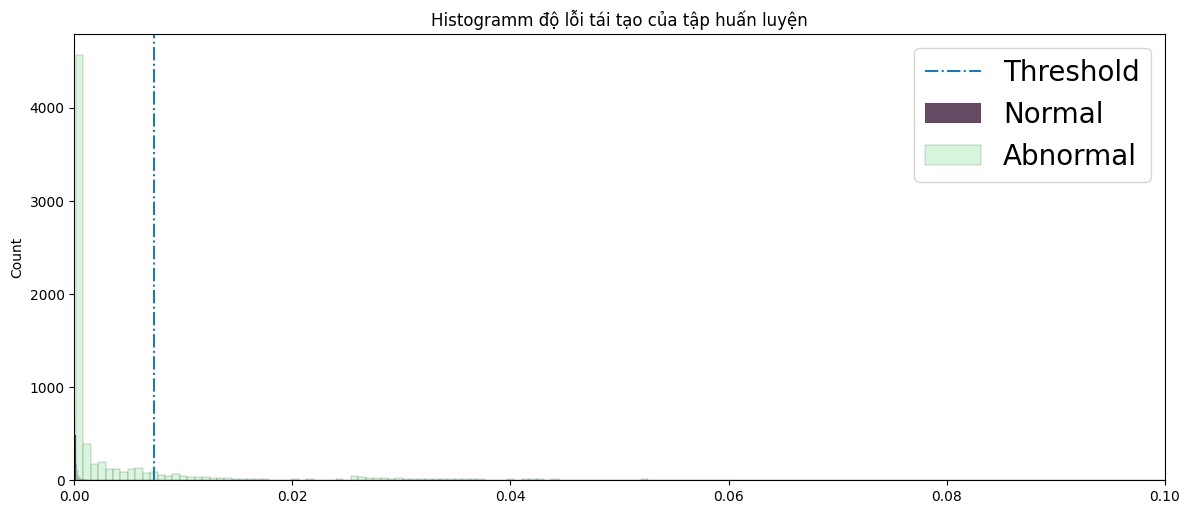

In [28]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=train_normal_re, label='Normal', kde=False, ax=ax, color='#330C2F')
sns.histplot(data=train_abnormal_re, label='Abnormal', kde=False, ax=ax, color='#CBF3D2')
ax.axvline(threshold, ls='-.', label='Threshold')
ax.legend(loc='best', fontsize=20)
ax.set_xlim([0, 0.1])
fig.tight_layout()
plt.title('Histogramm độ lỗi tái tạo của tập huấn luyện')
plt.show()

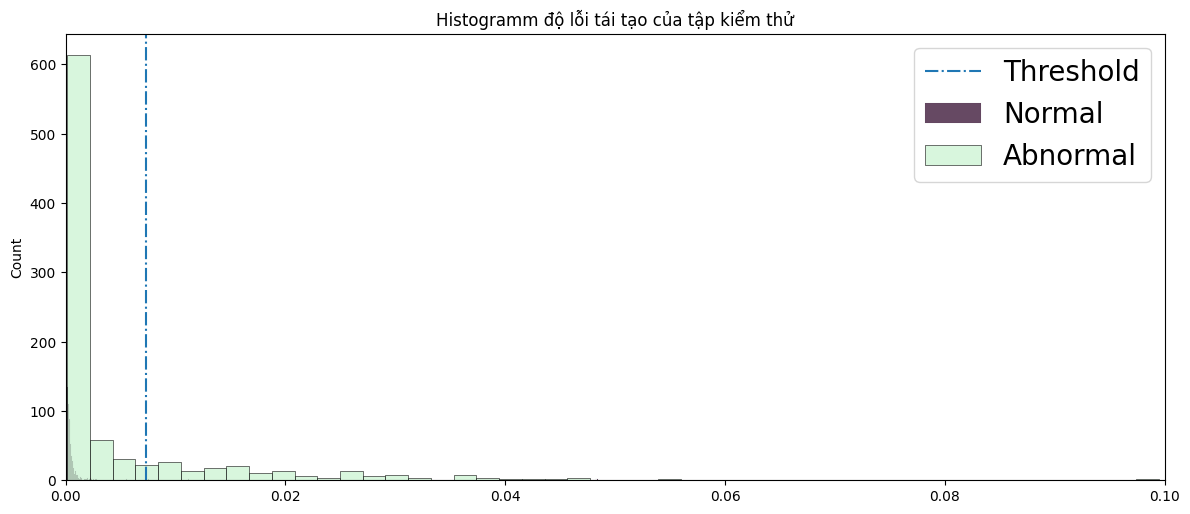

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=test_normal_re, label='Normal', kde=False, ax=ax, color='#330C2F')
sns.histplot(data=test_abnormal_re, label='Abnormal', kde=False, ax=ax, color='#CBF3D2')
ax.axvline(threshold, ls='-.', label='Threshold')
ax.legend(loc='best', fontsize=20)
ax.set_xlim([0, 0.1])
fig.tight_layout()
plt.title('Histogramm độ lỗi tái tạo của tập kiểm thử')
plt.show()

In [33]:
train_label_predict = model.predict_class(Test_abnor, threshold)
print('Độ chính xác tập huấn luyện', end=': ')
accuracy_score(Label_abnor_test, train_label_predict)

32/32 [==============================] - 0s 2ms/step
Độ chính xác tập huấn luyện: 

0.289